# Project 1: Data Science by Mohammed Albluwi
</br>
</br>
</br>

<center><h1 style="font-size: 50px">Airbnb</h1></center>
<br><br><br><br><br><br>

## Contents
- [Gathering data](#gather)
- [Preprocessing Data](#preprocess)
- [Questions to explor the data](#questions)
    1. [Are there rental price differences between Seattle and Boston?](#q1)
    2. [Is there a seasonal peak in the bookings?](#q2)
    3. [Which city has higher rental demand?](#q2)
    4. [What are the top property types by average price?](#q4)
    5. [What are the most important predictors for the price of a rental?](#q5)
    6. [What is the customer opinion about the service?](#q6)

<a id='gather'></a>
## Gather

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import calendar
#import zipfile as z
import seaborn as sns
#import xgboost as xgb
import plotly.graph_objects as go
import plotly.io as pio
import os
import matplotlib. pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
import warnings

warnings.filterwarnings('ignore')

### Read files

In [228]:
# Boston files
boston_listings = pd.read_csv('Boston/listings.csv/listings.csv')
boston_calendar = pd.read_csv('Boston/calendar.csv/calendar.csv')
boston_reviews = pd.read_csv('Boston/reviews.csv/reviews.csv')

#Seattle files
seattle_listings = pd.read_csv('Seattle/listings.csv/listings.csv')
seattle_calendar = pd.read_csv('Seattle/calendar.csv/calendar.csv')
seattle_reviews = pd.read_csv('Seattle/reviews.csv/reviews.csv')

In [3]:
#size of the datasets

#Boston
print("Boston -> Listings: {}, Calendar:{}".format(boston_listings.shape, boston_calendar.shape) )

#Seattle
print("Seattle -> Listings: {}, Calendar:{}".format(seattle_listings.shape, seattle_calendar.shape) )


Boston -> Listings: (3973, 75), Calendar:(1450145, 7)
Seattle -> Listings: (6636, 75), Calendar:(2421778, 7)


In [4]:
boston_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53733454,https://www.airbnb.com/rooms/53733454,20230621232759,2023-06-22,city scrape,Rental unit in Boston · 1 bedroom · 1 bed · 1 ...,Show up and start living from day one in Bosto...,This furnished apartment is located in Seaport...,https://a0.muscache.com/pictures/prohost-api/H...,107434423,...,NaN,NaN,NaN,NaN,f,337,337,0,0,NaN
1,48001906,https://www.airbnb.com/rooms/48001906,20230621232759,2023-06-22,city scrape,Rental unit in Boston · ★4.97 · 3 bedrooms · 3...,Newly renovated 3 Bedroom | 1 Bath ground-leve...,The North End is Boston's oldest residential n...,https://a0.muscache.com/pictures/853ccf49-8c81...,9410008,...,4.99,4.97,4.79,STR-441409,t,20,20,0,0,2.64
2,579003720446743556,https://www.airbnb.com/rooms/579003720446743556,20230621232759,2023-06-22,city scrape,Rental unit in Boston · ★4.48 · 1 bedroom · 1 ...,Thatch Quarters™ on Broadway is located in the...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,814298,...,4.56,4.67,4.44,Exempt: This listing is a hotel or motel,t,61,24,37,0,2.08
3,582613302102919663,https://www.airbnb.com/rooms/582613302102919663,20230621232759,2023-06-22,city scrape,Condo in Boston · 2 bedrooms · 2 beds · 2 baths,Bright and spacious recently renovated condo i...,"Historic East Boston with vibrating nightlife,...",https://a0.muscache.com/pictures/miso/Hosting-...,10647949,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,820838307213765478,https://www.airbnb.com/rooms/820838307213765478,20230621232759,2023-06-22,city scrape,Rental unit in Boston · 3 bedrooms · 1 bed · 0...,This 99 square footage room on Boston's Allsto...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,297860058,...,NaN,NaN,NaN,NaN,f,240,5,235,0,NaN


In [5]:
boston_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3781,2023-06-22,f,$120.00,$120.00,32.0,1125.0
1,3781,2023-06-23,f,$120.00,$120.00,32.0,1125.0
2,3781,2023-06-24,f,$120.00,$120.00,32.0,1125.0
3,3781,2023-06-25,f,$120.00,$120.00,32.0,1125.0
4,3781,2023-06-26,f,$120.00,$120.00,32.0,1125.0


In [6]:
#check if the id and listing_id variables are the connector for the two DFs
boston_calendar[boston_calendar['listing_id']==boston_listings['id'][0]]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
892060,53733454,2023-06-22,f,$364.00,$364.00,360.0,1125.0
892061,53733454,2023-06-23,f,$364.00,$364.00,360.0,1125.0
892062,53733454,2023-06-24,f,$364.00,$364.00,360.0,1125.0
892063,53733454,2023-06-25,f,$364.00,$364.00,360.0,1125.0
892064,53733454,2023-06-26,f,$364.00,$364.00,360.0,1125.0
...,...,...,...,...,...,...,...
892420,53733454,2024-06-16,t,$364.00,$364.00,32.0,1125.0
892421,53733454,2024-06-17,t,$364.00,$364.00,32.0,1125.0
892422,53733454,2024-06-18,t,$364.00,$364.00,32.0,1125.0
892423,53733454,2024-06-19,t,$364.00,$364.00,32.0,1125.0


In [7]:
seattle_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,5.00,4.61,4.65,STR-OPLI-19-000171,f,1,1,0,0,0.28
1,12518952,https://www.airbnb.com/rooms/12518952,20230624173239,2023-06-25,city scrape,Guest suite in Seattle · ★5.0 · 2 bedrooms · 6...,"Newly painted, beautiful, bright and wonderfu...","Many good restaurants and cafés, bathhouse the...",https://a0.muscache.com/pictures/9ff506f6-8927...,12677600,...,5.00,5.00,4.83,STR-OPLI-19-002061,f,1,1,0,0,0.71
2,521597880867717063,https://www.airbnb.com/rooms/521597880867717063,20230624173239,2023-06-24,city scrape,Serviced apartment in Seattle · Studio · 1 bath,Centrally located in the Adams neighborhood of...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,48005494,...,5.00,3.50,5.00,NaN,f,36,36,0,0,0.44
3,17889172,https://www.airbnb.com/rooms/17889172,20230624173239,2023-06-24,city scrape,Rental unit in Seattle · ★5.0 · 1 bedroom · 1 ...,Mid-century apartment well preserved with rece...,Central Wallingford location. Close to Stone W...,https://a0.muscache.com/pictures/706ab66c-9cda...,66909032,...,5.00,4.96,4.89,STR-OPLI-19-000865,f,4,4,0,0,0.38
4,15917796,https://www.airbnb.com/rooms/15917796,20230624173239,2023-06-24,city scrape,Home in Seattle · ★4.60 · Studio · 3 beds · 1 ...,"The Carriage House is close to Eastlake Union,...",The neighborhood contains a mixture of residen...,https://a0.muscache.com/pictures/d56dc8ce-e594...,38021932,...,4.77,4.93,4.33,STR-OPLI-19-003016,f,1,1,0,0,0.38


In [8]:
seattle_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-06-24,f,$99.00,$99.00,30.0,1125.0
1,6606,2023-06-25,f,$99.00,$99.00,30.0,1125.0
2,6606,2023-06-26,f,$99.00,$99.00,30.0,1125.0
3,6606,2023-06-27,f,$99.00,$99.00,30.0,1125.0
4,6606,2023-06-28,f,$99.00,$99.00,30.0,1125.0


<a id='preprocess'></a>
## Preprocessing Data

In [9]:
#size
boston_listings.shape, boston_calendar.shape

((3973, 75), (1450145, 7))

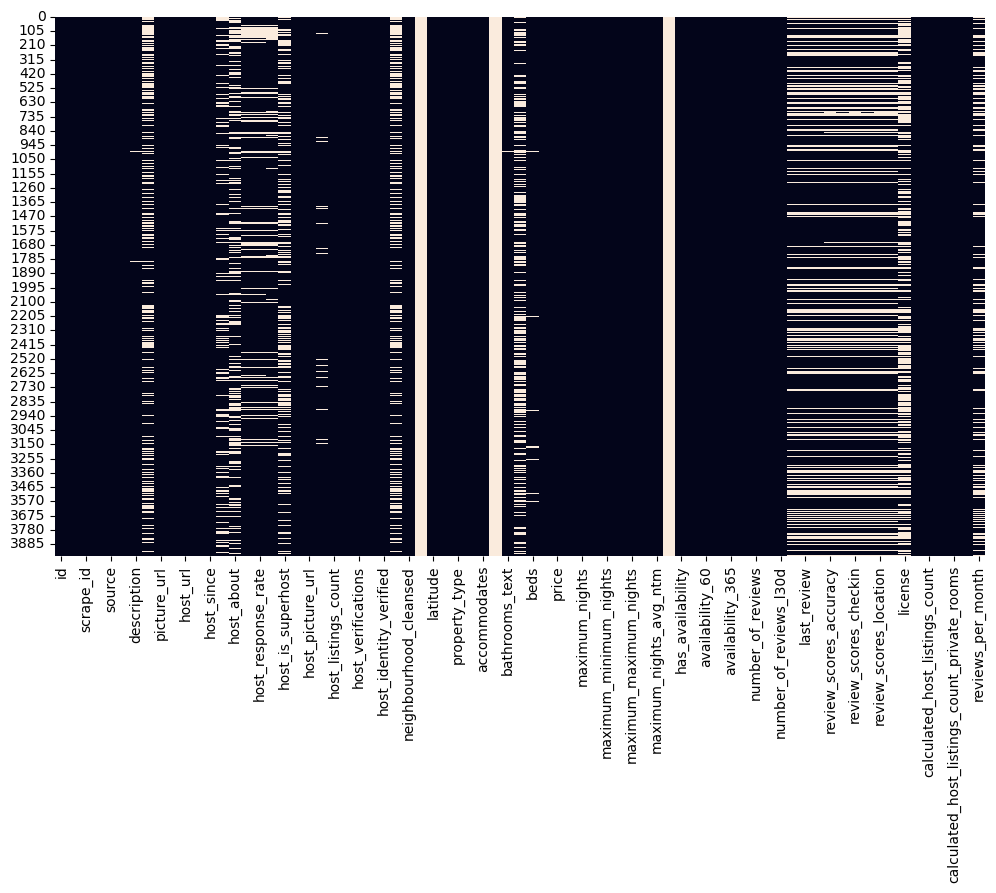

In [10]:
# plot missing values patterns for the listings DF where light indicates missing
plt.figure(figsize=(12,7))
sns.heatmap(boston_listings.isnull(), cbar=False)
plt.savefig('plots/missing_values_listings_Boston',bbox_inches='tight')
plt.show()


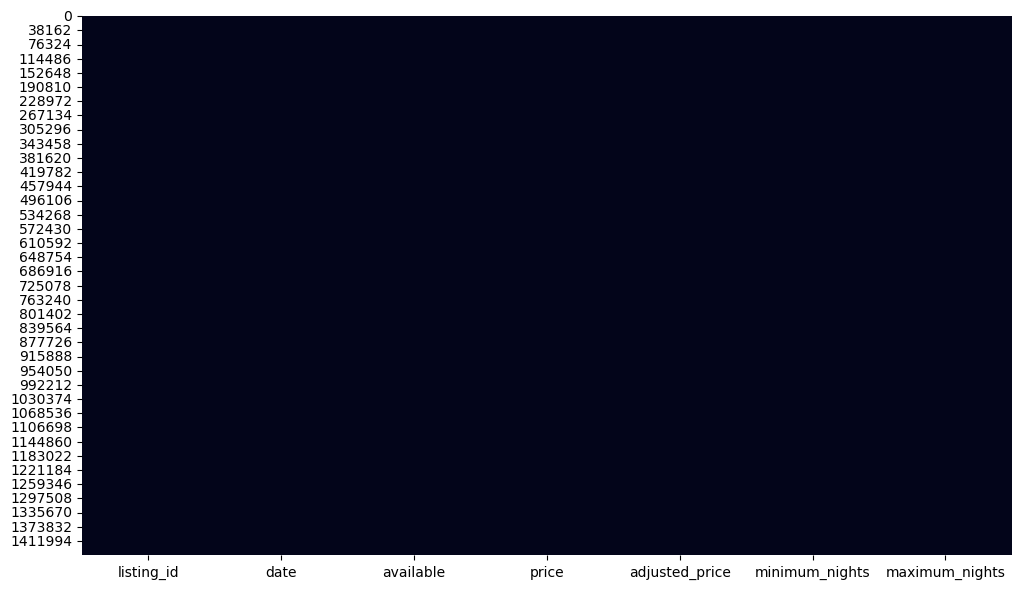

In [11]:
# plot missing values patterns for the calender DF where light indicates missing
plt.figure(figsize=(12,7))
sns.heatmap(boston_calendar.isnull(), cbar=False)
plt.savefig('plots/missing_values_calendars_Boston',bbox_inches='tight')
plt.show()

In [12]:
missing_df = boston_listings.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df

,variable,missing values
0,id,0
1,listing_url,0
2,scrape_id,0
3,last_scraped,0
4,source,0
...,...,...
70,calculated_host_listings_count,0
71,calculated_host_listings_count_entire_homes,0
72,calculated_host_listings_count_private_rooms,0
73,calculated_host_listings_count_shared_rooms,0


In [13]:
#lets check the percentage of filling values

missing_df = boston_listings.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']

missing_df['filling factor (%)']=(boston_listings.shape[0]-missing_df['missing values'])/boston_listings.shape[0]*100

missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,neighbourhood_group_cleansed,3973,0.000000
1,bathrooms,3973,0.000000
2,calendar_updated,3973,0.000000
3,license,2085,47.520765
4,bedrooms,1556,60.835641
...,...,...,...
70,maximum_minimum_nights,0,100.000000
71,minimum_maximum_nights,0,100.000000
72,minimum_nights_avg_ntm,0,100.000000
73,host_since,0,100.000000


In [14]:
# to get the columns with missing values less than 55%
def get_cols_with_less_mv(df):
    new_columns= []
    for col in df.columns.to_list():
        if df[col].isnull().sum()/df.shape[0] < 0.55:
            new_columns.append(col)
    return new_columns

In [15]:
#call the function to find out those columns
new_columns = get_cols_with_less_mv(boston_listings)

print("The number of columns having less than 55% of missing values " , len(new_columns) , " out of " , boston_listings.shape[1] )

The number of columns having less than 55% of missing values  72  out of  75


In [16]:
#imputate the missing values in the remaining columns

fill_mode = lambda col: col.fillna(col.mode()[0])
#new_df.apply(fill_mode, axis=0)


boston_listings_cleaned = boston_listings[new_columns]
boston_listings_cleaned = boston_listings_cleaned.apply(fill_mode, axis=0)


#check if there is missing values left
(boston_listings_cleaned.isnull().sum()).sum() == 0

True

In [17]:
# Let's find out if there is any duplicates
boston_listings_cleaned.duplicated().sum(), boston_calendar.duplicated().sum()

(0, 0)

In [18]:
# as we did for Boston DF, we will do it for seattle DF

## first, we need to check if there is any  missing value
(seattle_listings.isnull().sum()).sum()

37591

In [19]:
# let's remove the missing values
seattle_listings_cleaned = seattle_listings[get_cols_with_less_mv(seattle_listings)]
seattle_listings_cleaned = seattle_listings_cleaned.apply(fill_mode, axis=0)

#check if there is missing values left
(seattle_listings_cleaned.isnull().sum()).sum() == 0

True

In [20]:
# Let's find out if there is any duplicates
seattle_listings_cleaned.duplicated().sum(), seattle_calendar.duplicated().sum()

(0, 0)

Merging dataset

In [21]:
# merging dataset

#merge Boston datasets
new_boston_calendar = boston_calendar.rename(columns={"listing_id": "id"})
df_boston = pd.merge(boston_listings_cleaned, new_boston_calendar , on = 'id')

df_boston.head(5)

#merge Seattle datasets
new_seattle_calendar = seattle_calendar.rename(columns={"listing_id": "id"})
df_seattle = pd.merge(seattle_listings_cleaned, new_seattle_calendar , on = 'id')

df_boston.shape, df_seattle.shape

((1450145, 78), (2421778, 79))

In [22]:
#search for columns named price 
df_boston.filter(like="price", axis=1).head(5)

,price_x,price_y,adjusted_price
0,$364.00,$364.00,$364.00
1,$364.00,$364.00,$364.00
2,$364.00,$364.00,$364.00
3,$364.00,$364.00,$364.00
4,$364.00,$364.00,$364.00


In [23]:
# drop price_x, adjusted_price and rename price_x

#drop
df_boston.drop(columns=['price_x', 'adjusted_price'], inplace=True)
df_seattle.drop(columns=['price_x', 'adjusted_price'], inplace=True)

#rename
df_boston = df_boston.rename(columns = {'price_y':'price'})
df_seattle = df_seattle.rename(columns = {'price_y':'price'})

In [24]:
#get the type of price
type(df_boston['price'])

pandas.core.series.Series

In [25]:
# convert price to float
df_boston.price = df_boston['price'].str.replace('$','').str.replace(',','').astype('float')
df_seattle.price = df_seattle['price'].str.replace('$','').str.replace(',','').astype('float')

In [26]:
df_boston[['price']].head(3)

,price
0,364.0
1,364.0
2,364.0


In [27]:
#check if there is zero values in price column
df_boston[df_boston['price']==0].count()[0] ==0, df_seattle[df_seattle['price']==0].count()[0] ==0

(False, True)

In [28]:
#how many?
df_boston[df_boston['price']==0].count()[0]

365

In [29]:
#we better remove them

indexPrice = df_boston[df_boston['price']==0].index
df_boston.drop(indexPrice , inplace=True)
df_boston.reset_index(inplace=True)
df_boston.drop(columns=['index'],inplace=True)
df_boston.shape

(1449780, 76)

In [30]:
df_seattle

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,date,available,price,minimum_nights_y,maximum_nights_y
0,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,1,1,0,0,0.28,2023-06-25,f,240.0,4.0,200.0
1,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,1,1,0,0,0.28,2023-06-26,t,240.0,4.0,22.0
2,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,1,1,0,0,0.28,2023-06-27,t,240.0,4.0,22.0
3,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,1,1,0,0,0.28,2023-06-28,t,240.0,4.0,22.0
4,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,1,1,0,0,0.28,2023-06-29,t,240.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421773,51107857,https://www.airbnb.com/rooms/51107857,20230624173239,2023-06-25,previous scrape,Serviced apartment in Seattle · ★4.30 · 1 bedr...,The Wallingford Hotel is conveniently located ...,This furnished apartment is situated in South ...,https://a0.muscache.com/pictures/9707b421-4f95...,122723469,...,1,1,0,0,0.43,2024-06-19,f,299.0,30.0,1125.0
2421774,51107857,https://www.airbnb.com/rooms/51107857,20230624173239,2023-06-25,previous scrape,Serviced apartment in Seattle · ★4.30 · 1 bedr...,The Wallingford Hotel is conveniently located ...,This furnished apartment is situated in South ...,https://a0.muscache.com/pictures/9707b421-4f95...,122723469,...,1,1,0,0,0.43,2024-06-20,f,299.0,30.0,1125.0
2421775,51107857,https://www.airbnb.com/rooms/51107857,20230624173239,2023-06-25,previous scrape,Serviced apartment in Seattle · ★4.30 · 1 bedr...,The Wallingford Hotel is conveniently located ...,This furnished apartment is situated in South ...,https://a0.muscache.com/pictures/9707b421-4f95...,122723469,...,1,1,0,0,0.43,2024-06-21,f,299.0,30.0,1125.0
2421776,51107857,https://www.airbnb.com/rooms/51107857,20230624173239,2023-06-25,previous scrape,Serviced apartment in Seattle · ★4.30 · 1 bedr...,The Wallingford Hotel is conveniently located ...,This furnished apartment is situated in South ...,https://a0.muscache.com/pictures/9707b421-4f95...,122723469,...,1,1,0,0,0.43,2024-06-22,f,299.0,30.0,1125.0


In [31]:
#search for columns named date
df_boston.filter(like="date", axis=1).head(5)

,accommodates,date
0,2,2023-06-22
1,2,2023-06-23
2,2,2023-06-24
3,2,2023-06-25
4,2,2023-06-26


In [32]:
#check the type of date
type(df_boston['date'])

pandas.core.series.Series

In [34]:
# # split 'date' new columns

from dateutil.parser import parse
df_boston1 = df_boston.copy()
df_seattle1 = df_seattle.copy()
df_boston1['date'] = df_boston1['date'].map(lambda x: parse(x))
df_seattle1['date'] = df_seattle1['date'].map(lambda x: parse(x))

#Boston
df_boston1['month'] = df_boston1.date.dt.month
df_boston1['dayofweek'] = df_boston1.date.dt.dayofweek
df_boston1['year'] = df_boston1.date.dt.year
df_boston1['dayofyear'] = df_boston1.date.dt.dayofyear


#Seattle
df_seattle1['month'] = df_seattle1.date.dt.month
df_seattle1['dayofweek'] = df_seattle1.date.dt.dayofweek
df_seattle1['year'] = df_seattle1.date.dt.year
df_seattle1['dayofyear'] = df_seattle1.date.dt.dayofyear


In [35]:
#sort datasets
df_boston1.sort_values(by = ['id', 'date', 'available'], inplace= True)
df_seattle1.sort_values(by = ['id', 'date', 'available'], inplace= True)

In [39]:
df_boston2 = df_boston1.copy()
df_seattle2 = df_seattle1.copy()

In [40]:
#get the average price by month, day of week and day of year

#Boston
df_boston2['monthly_avg'] = df_boston1.groupby('month').price.transform('mean')
df_boston2['weekday_avg'] = df_boston1.groupby('dayofweek').price.transform('mean')
df_boston2['dayofyear_avg'] = df_boston1.groupby('dayofyear').price.transform('mean')

#Seattle
df_seattle2['monthly_avg'] = df_seattle1.groupby('month').price.transform('mean')
df_seattle2['weekday_avg'] = df_seattle1.groupby('dayofweek').price.transform('mean')
df_seattle2['dayofyear_avg'] = df_seattle1.groupby('dayofyear').price.transform('mean')

#boston_price_stats= boston_price_stats.drop(['listing_id', 'date', 'price','available'], axis = 1).groupby(['month', 'day_of_the_year','week_day' ]).max().reset_index()

In [41]:
df_seattle1['month'] 

1072371    6
1072372    6
1072373    6
1072374    6
1072375    6
          ..
1821347    6
1821348    6
1821349    6
1821350    6
1821351    6
Name: month, Length: 2421778, dtype: int64

------------------------------

<a id='questions'></a>
## Questions to explor the data
   
   1. [Are there rental price differences between Seattle and Boston?](#q1)
   2. [Is there a seasonal peak in the bookings?](#q2)
   3. [Which city has higher rental demand?](#q2)
   4. [What are the top property types by average price?](#q4)
   5. [What are the most important predictors for the price of a rental?](#q5)
   6. [What is the customer opinion about the service?](#q6)

<a id='q1'></a>
## Question 1

In [47]:
#get the mean of price for the two cities

df_boston2['price'].mean(),df_seattle2['price'].mean()

(251.05791913255806, 210.10054678835138)

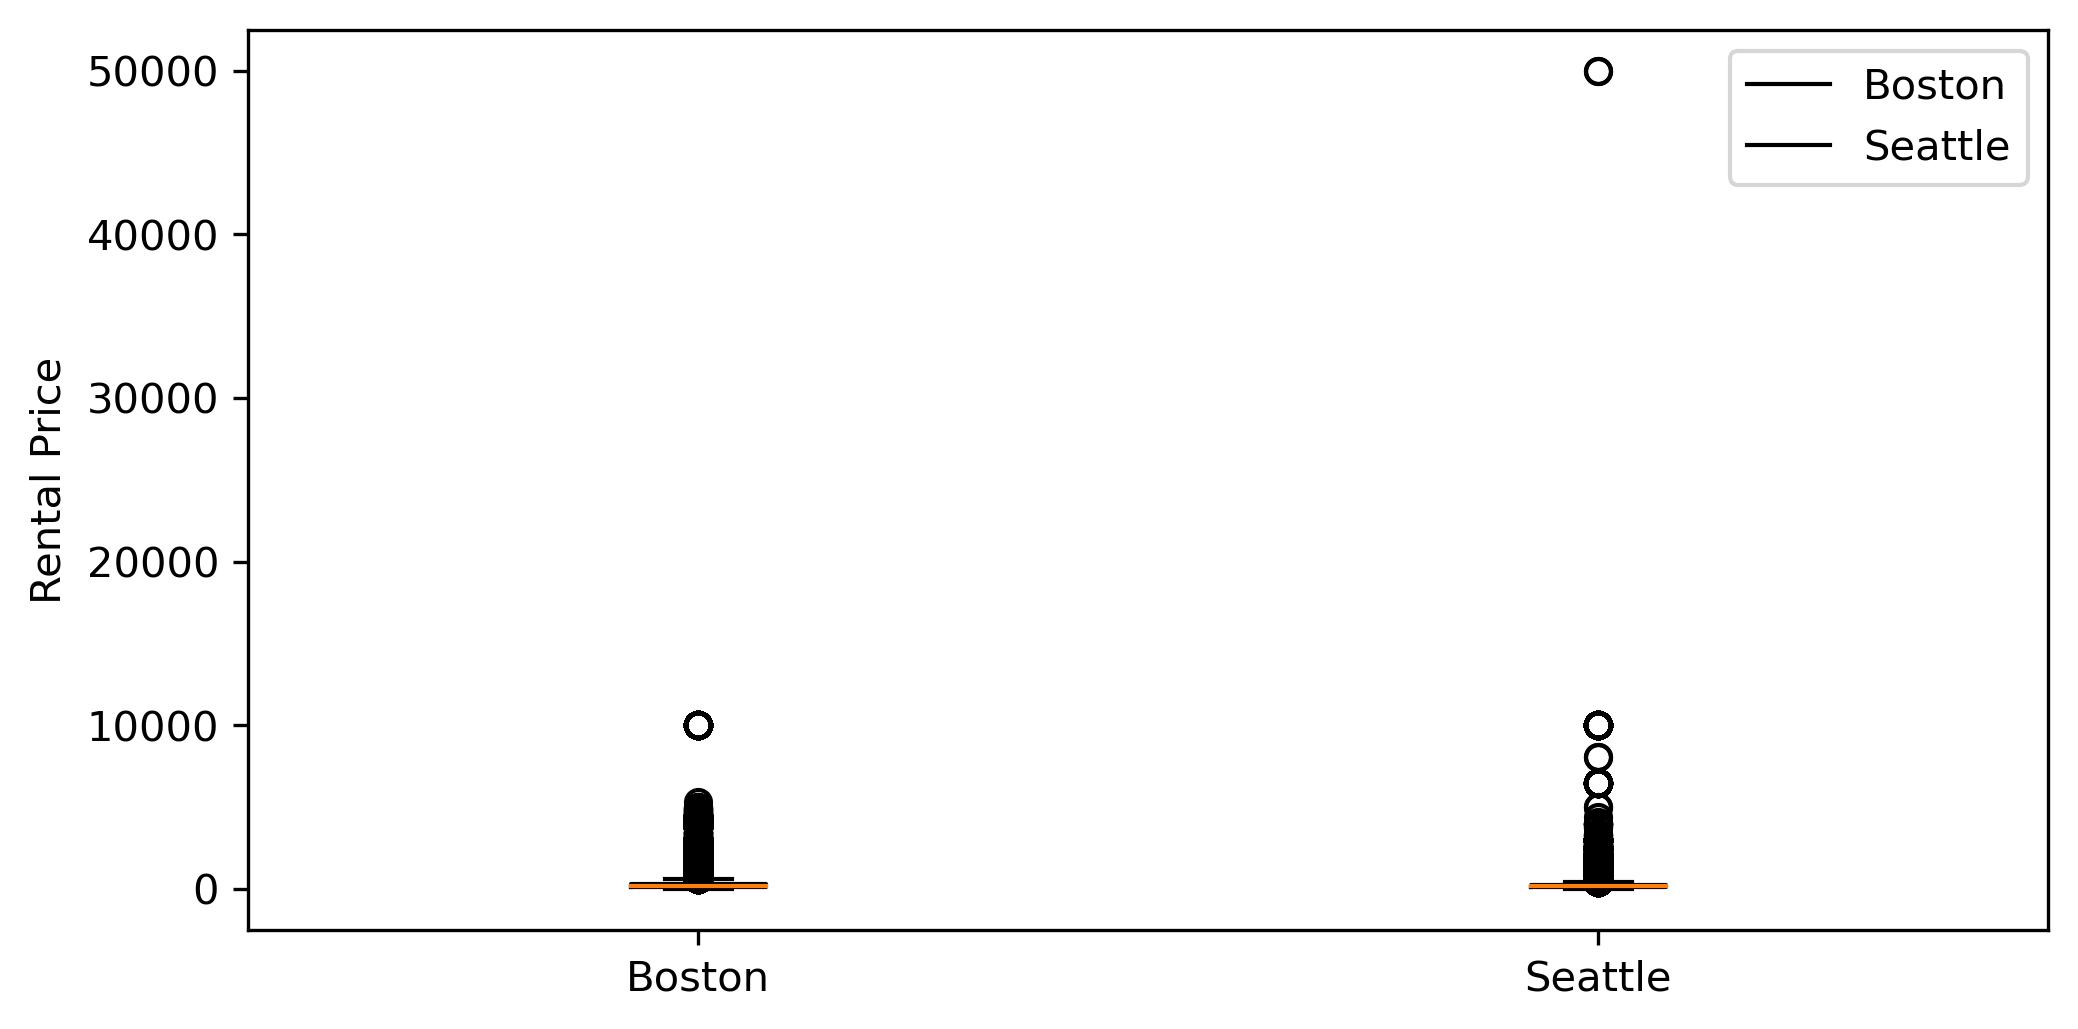

In [48]:
#box plot of price ranges
#looks like Boston has major outliers @ $7000
fig = plt.figure(figsize=(6,3),dpi=300)
ax = fig.add_axes([0,0,1,1])
#ax.boxplot([df_boston2['price'], df_seattle2['price']])
ax.boxplot([df_boston2['price'], df_seattle['price']])
ax.set_xticklabels(['Boston', 'Seattle'])
ax.set_ylabel('Rental Price');
ax.legend(['Boston','Seattle'])
plt.savefig('plots/boxplot_price_Bostone',bbox_inches='tight')

In [49]:
df_boston_describe= df_boston2['price'].describe()
df_boston_describe = df_boston_describe.to_frame()
df_boston_describe = df_boston_describe.T


df_seattle_describe= df_seattle2['price'].describe()
df_seattle_describe = df_seattle_describe.to_frame()
df_seattle_describe = df_seattle_describe.T


df_all_descibe= pd.concat([df_boston_describe,df_seattle_describe])

city=['Boston','Seattle']
df_all_descibe.index=city
df_all_descibe

,count,mean,std,min,25%,50%,75%,max
Boston,1449780.0,251.057919,359.995156,20.0,100.0,179.0,298.0,10000.0
Seattle,2421778.0,210.100547,257.985296,10.0,112.0,160.0,250.0,50000.0


From the plot and table above, we conclude that there is no significant difference in the average price. The spread out of the cost for Boston is larger than for Seattle. However, some rental prices in Seattle are bigger than in Boston but are outliers.

In [50]:
#pick up price column for each city and concat them into one dataset.

#create a new DF with price for Boston
df_temp1 = pd.DataFrame()
df_temp1 = df_boston2[['price']]
df_temp1['city']='Boston'

#create a new DF with price for Seattle
df_temp2 = pd.DataFrame()
df_temp2 = df_seattle2[['price']]
df_temp2['city']='Seattle'

#concat the two dataset
df_temp=pd.DataFrame()
df_temp = pd.concat([df_temp1,df_temp2], ignore_index=False, sort=True)

df_temp.columns

Index(['city', 'price'], dtype='object')

In [51]:
df_temp.city.value_counts()

Seattle    2421778
Boston     1449780
Name: city, dtype: int64

In [53]:
#select only price that are less than 1000 to make plot more clear
df_temp = df_temp[df_temp['price'] < 1000]

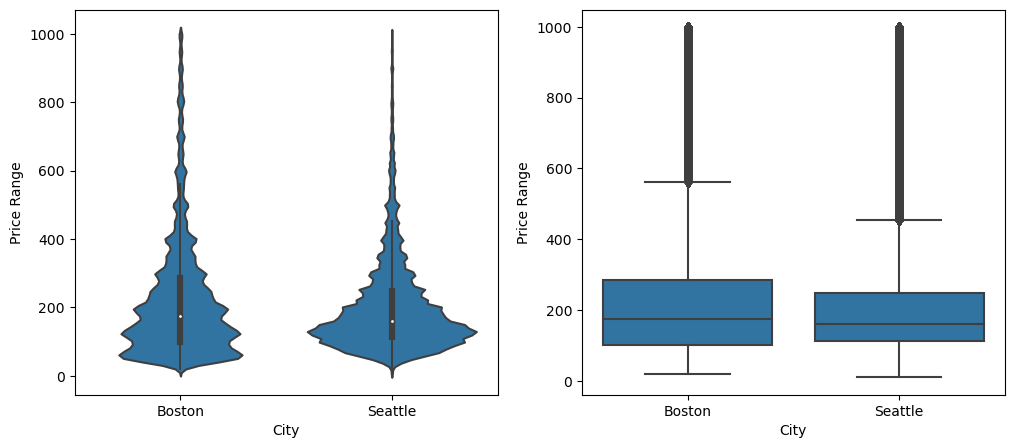

In [54]:
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]


# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df_temp, x='city', y='price', color=base_color, innner='quartile')
#plt.xticks(rotation=15);
plt.xlabel("City")
plt.ylabel("Price Range")
# # RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df_temp, x='city', y='price', color=base_color)
plt.xlabel("City")
plt.ylabel("Price Range")
plt.savefig('plots/boxplot_price_range_Boston_Seattle',bbox_inches='tight')

The violin plot shows that the price distribution around the mean is much larger and reflects the STD shown in the table.

Lets get the daily average of rental price

In [55]:
df_boston_group= df_boston2.drop(['id', 'date', 'price','available'], axis = 1).groupby(['month', 'dayofyear','dayofweek' ]).max().reset_index()
df_seattle_group= df_seattle2.drop(['id', 'date', 'price','available'], axis = 1).groupby(['month', 'dayofyear','dayofweek' ]).max().reset_index()

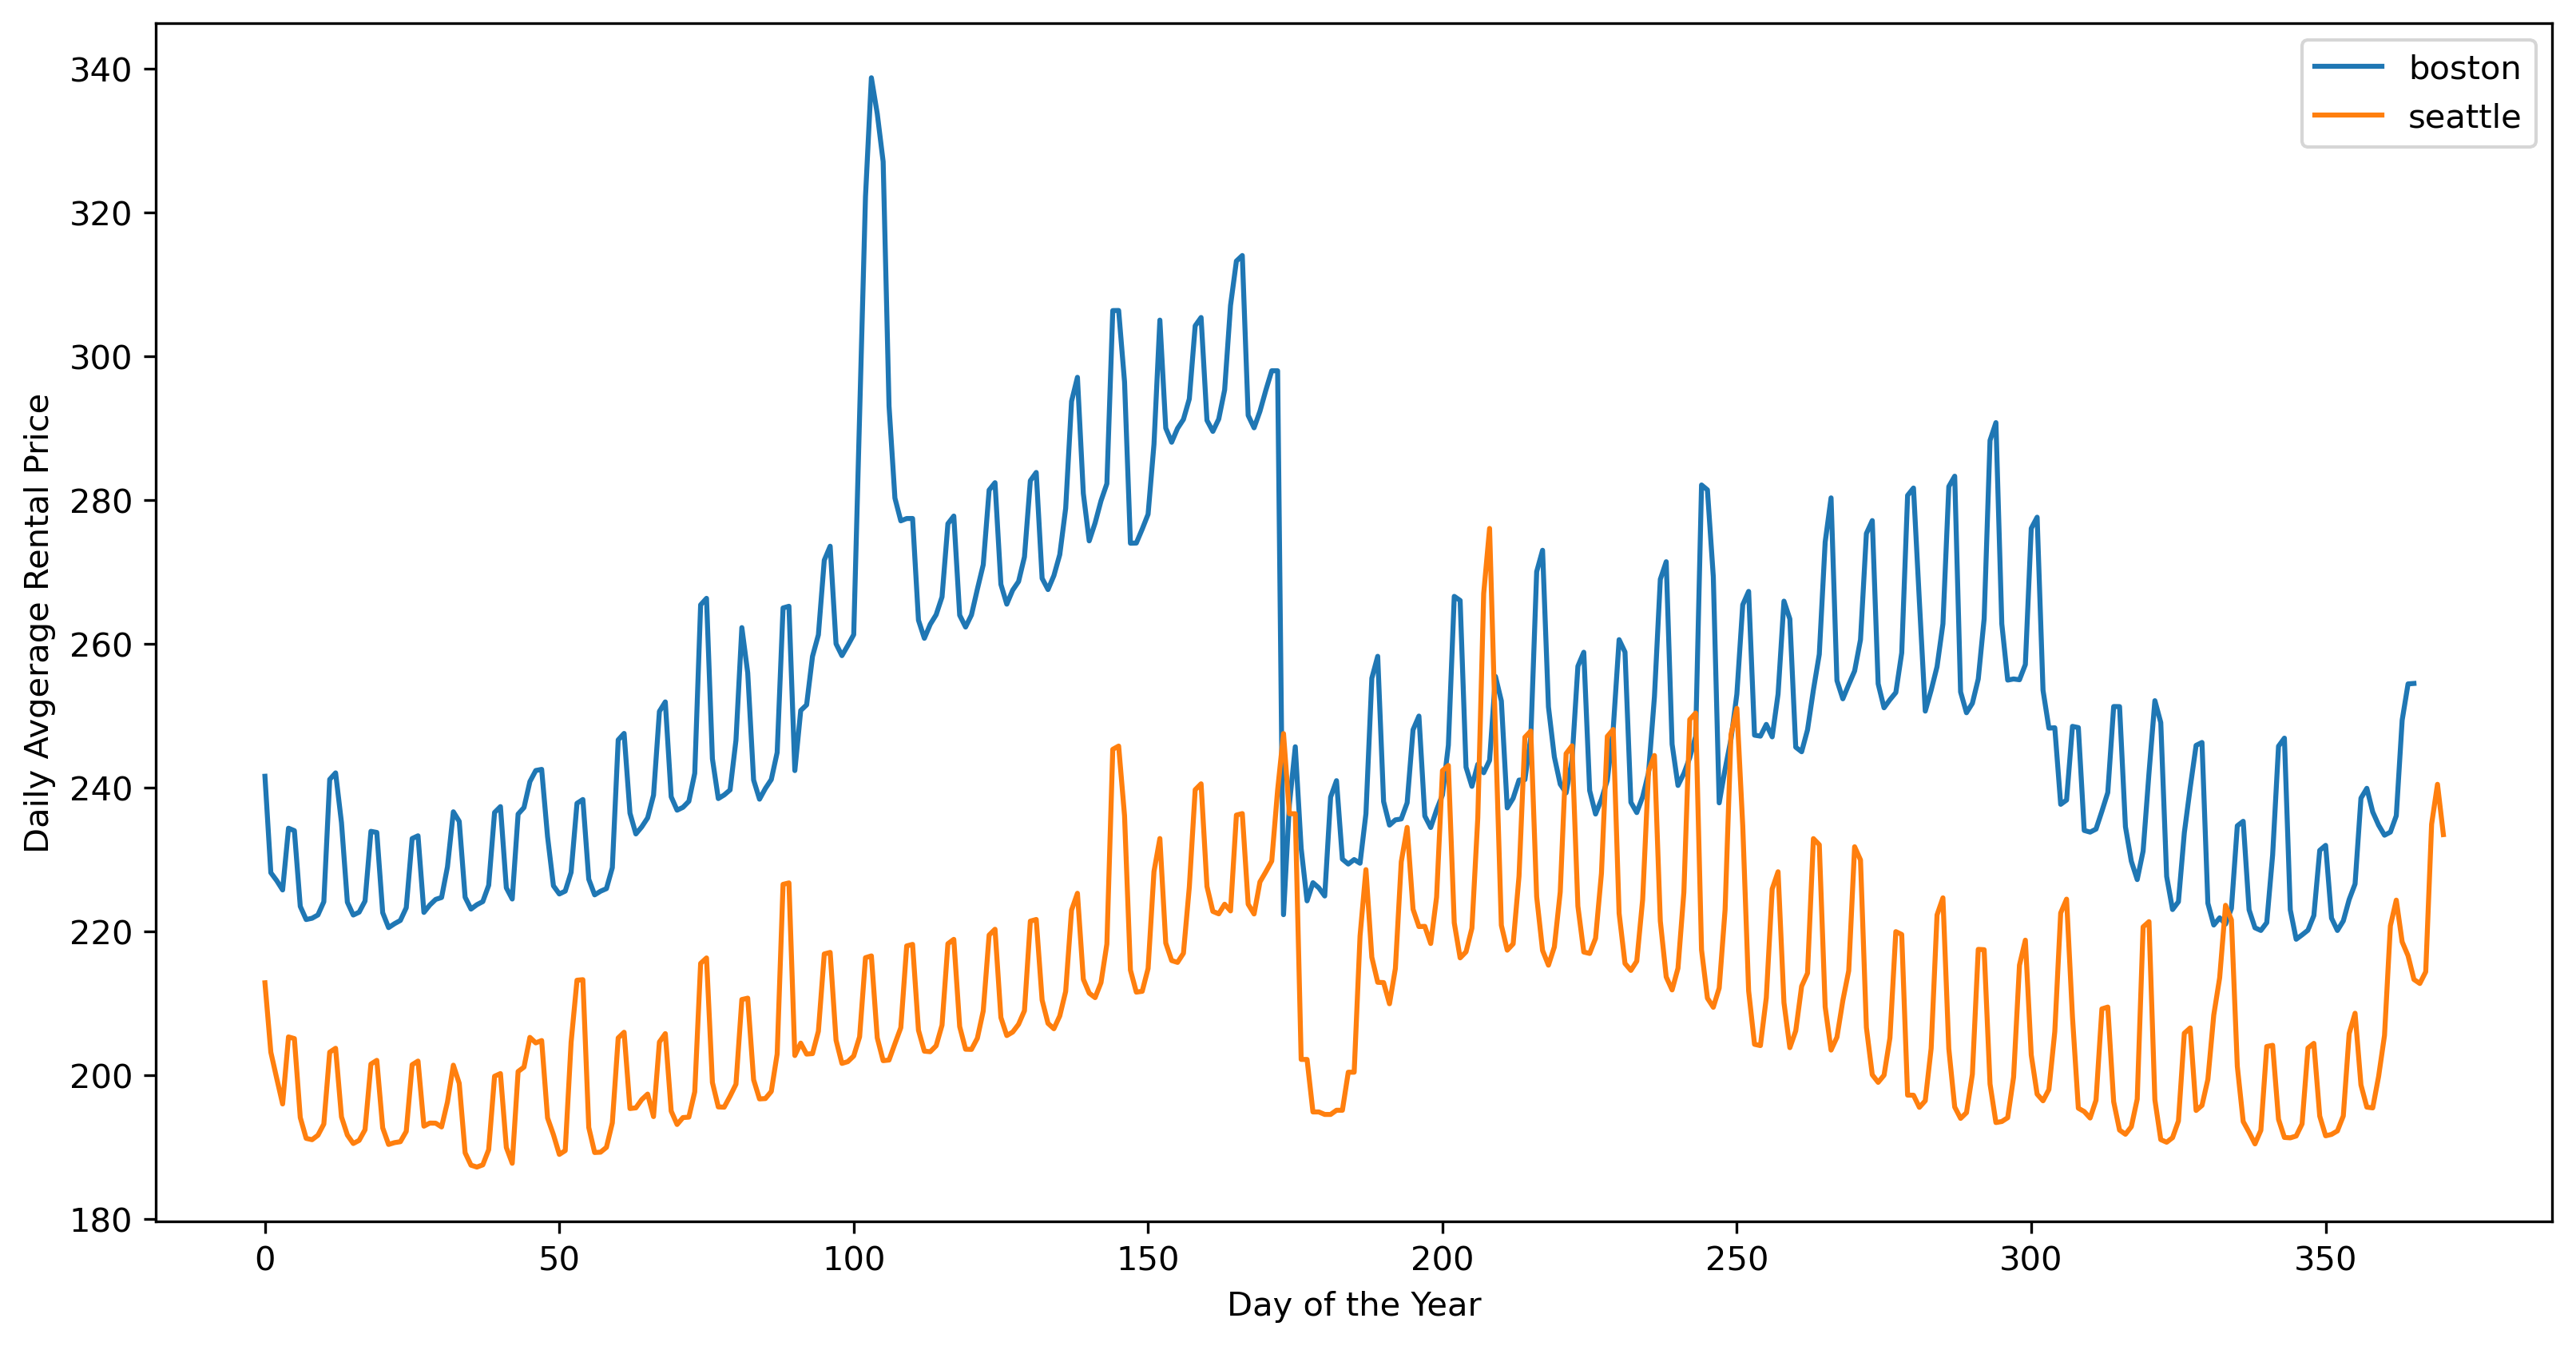

In [56]:
fig = plt.figure(figsize=(10,5),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.plot(df_boston_group['dayofyear_avg'], label='boston')
ax.plot(df_seattle_group['dayofyear_avg'], label='seattle')
ax.legend()
ax.set_xlabel('Day of the Year')
ax.set_ylabel('Daily Avgerage Rental Price');
plt.savefig('daily_average_rental_price')
plt.savefig('plots/daily_average_rental_price',bbox_inches='tight')

-----------------------------------------

<a id='q2'></a>
## Question 2

The number of booking by months

In [58]:
#filter data with available = false
df_boston_temp = df_boston2[df_boston2['available']=="f"].copy()
df_seattle_temp = df_seattle2[df_seattle2['available']=="f"].copy()

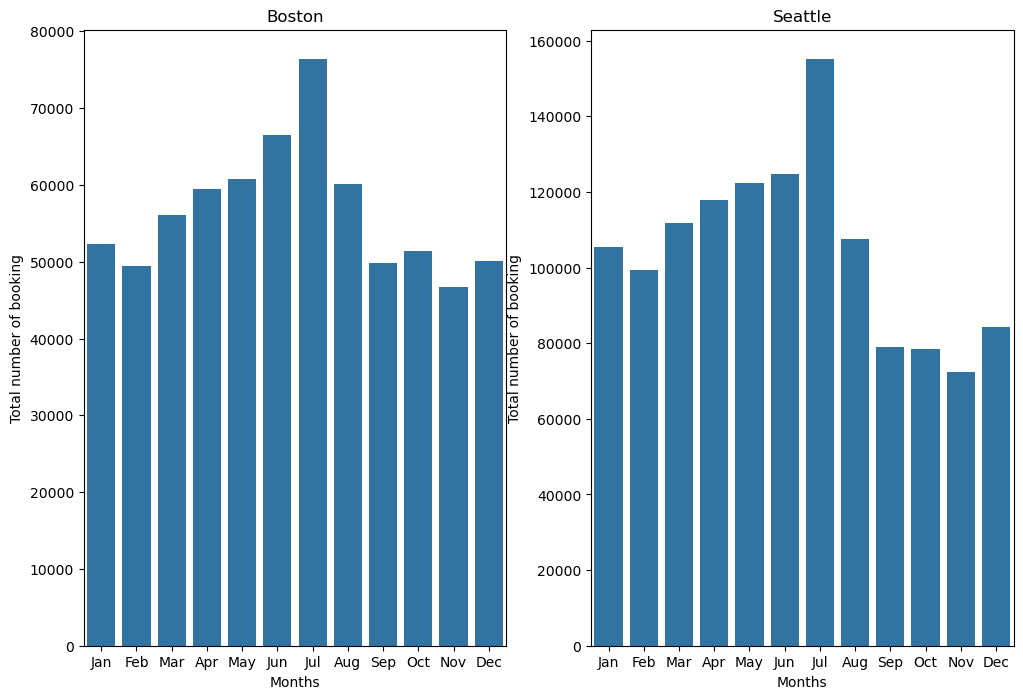

In [59]:
plt.figure(figsize = [12, 8])

# make a temp copy of datasets
df_boston_temp = df_boston2[df_boston2['available']=="f"].copy()
df_seattle_temp = df_seattle2[df_seattle2['available']=="f"].copy()

#sort by weekdays
df_boston_temp.sort_values(by=['month'], inplace =True)
df_seattle_temp.sort_values(by=['month'], inplace =True)

# convert the months numbers to months names
df_boston_temp['month'] = df_boston_temp['month'].apply(lambda x: calendar.month_abbr[x])
df_seattle_temp['month'] = df_seattle_temp['month'].apply(lambda x: calendar.month_abbr[x])


months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.subplot(1,2,1) 
#fig, ax = plt.subplots(1, 2,figsize = [15, 10])
sb.countplot(data=df_boston_temp, x='month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bookings")
plt.title("Boston")

plt.subplot(1,2,2) 
sb.countplot(data=df_seattle_temp, x='month', color=base_color);
plt.xlabel("Months")
plt.ylabel("Total number of bookings")
plt.title("Seattle")
plt.savefig('plots/number_booking_by_months',bbox_inches='tight')

The number of booking by weekdays

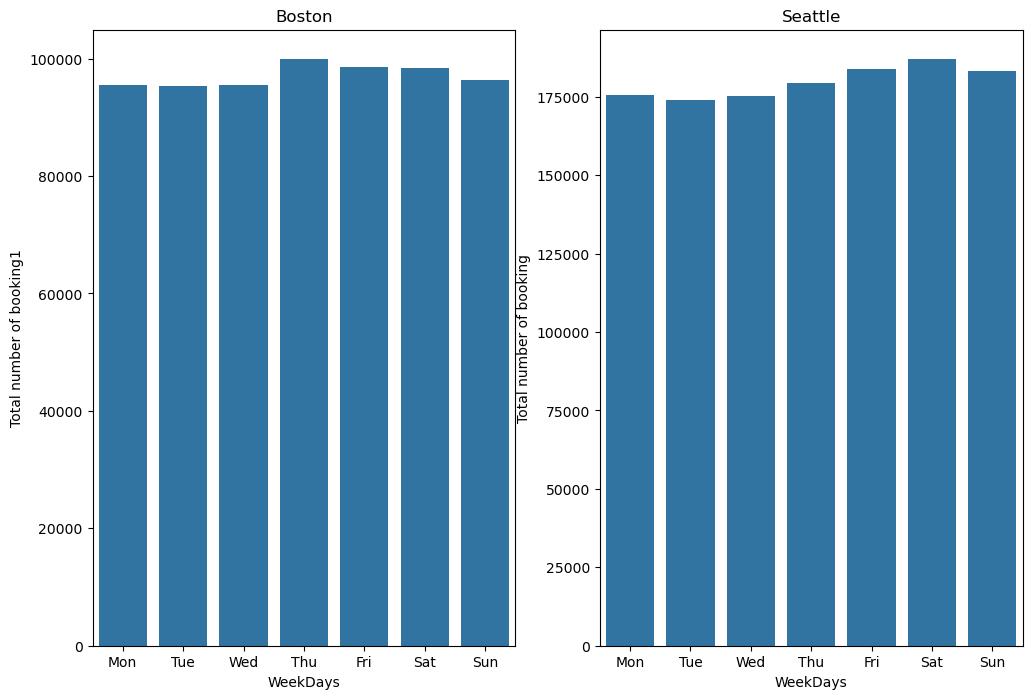

In [60]:
plt.figure(figsize = [12, 8])

# make a temp copy of datasets
df_boston_temp = df_boston2[df_boston2['available']=="f"].copy()
df_seattle_temp = df_seattle2[df_seattle2['available']=="f"].copy()

#sort by weekdays
df_boston_temp.sort_values(by=['dayofweek'], inplace =True)
df_seattle_temp.sort_values(by=['dayofweek'], inplace =True)

# convert weekdays numbers to weekdays names
df_boston_temp['dayofweek'] = df_boston_temp['dayofweek'].apply(lambda x: calendar.day_abbr[x])
df_seattle_temp['dayofweek'] = df_seattle_temp['dayofweek'].apply(lambda x: calendar.day_abbr[x])


weekdays = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']


plt.subplot(1,2,1) 
#fig, ax = plt.subplots(1, 2,figsize = [15, 10])
sb.countplot(data=df_boston_temp, x='dayofweek', color=base_color);
plt.xlabel("WeekDays")
plt.ylabel("Total number of booking1")
plt.title("Boston")

plt.subplot(1,2,2) 
sb.countplot(data=df_seattle_temp, x='dayofweek', color=base_color);
plt.xlabel("WeekDays")
plt.ylabel("Total number of booking")
plt.title("Seattle")
plt.savefig('plots/number_booking_by_weekDays',bbox_inches='tight')

--------------------------------

<a id='q3'></a>
## Question 3

In [61]:
#check the avilability
df_boston2.filter(like="available", axis=1).value_counts()

available
t            770407
f            679373
dtype: int64

In [62]:
#just try it for might later use
pd.factorize(df_boston2.available)

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['f', 't'], dtype='object'))

In [63]:
#check the the availability by id
boston_available = df_boston2[df_boston2.available =='t'].sort_values(['date']).groupby(['id']).available.count().reset_index()
seattle_available = df_seattle2[df_seattle2.available =='t'].sort_values(['date']).groupby(['id']).available.count().reset_index()



print(seattle_available.available.mean(),boston_available.available.mean())

189.68638956805216 224.67395742198892


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


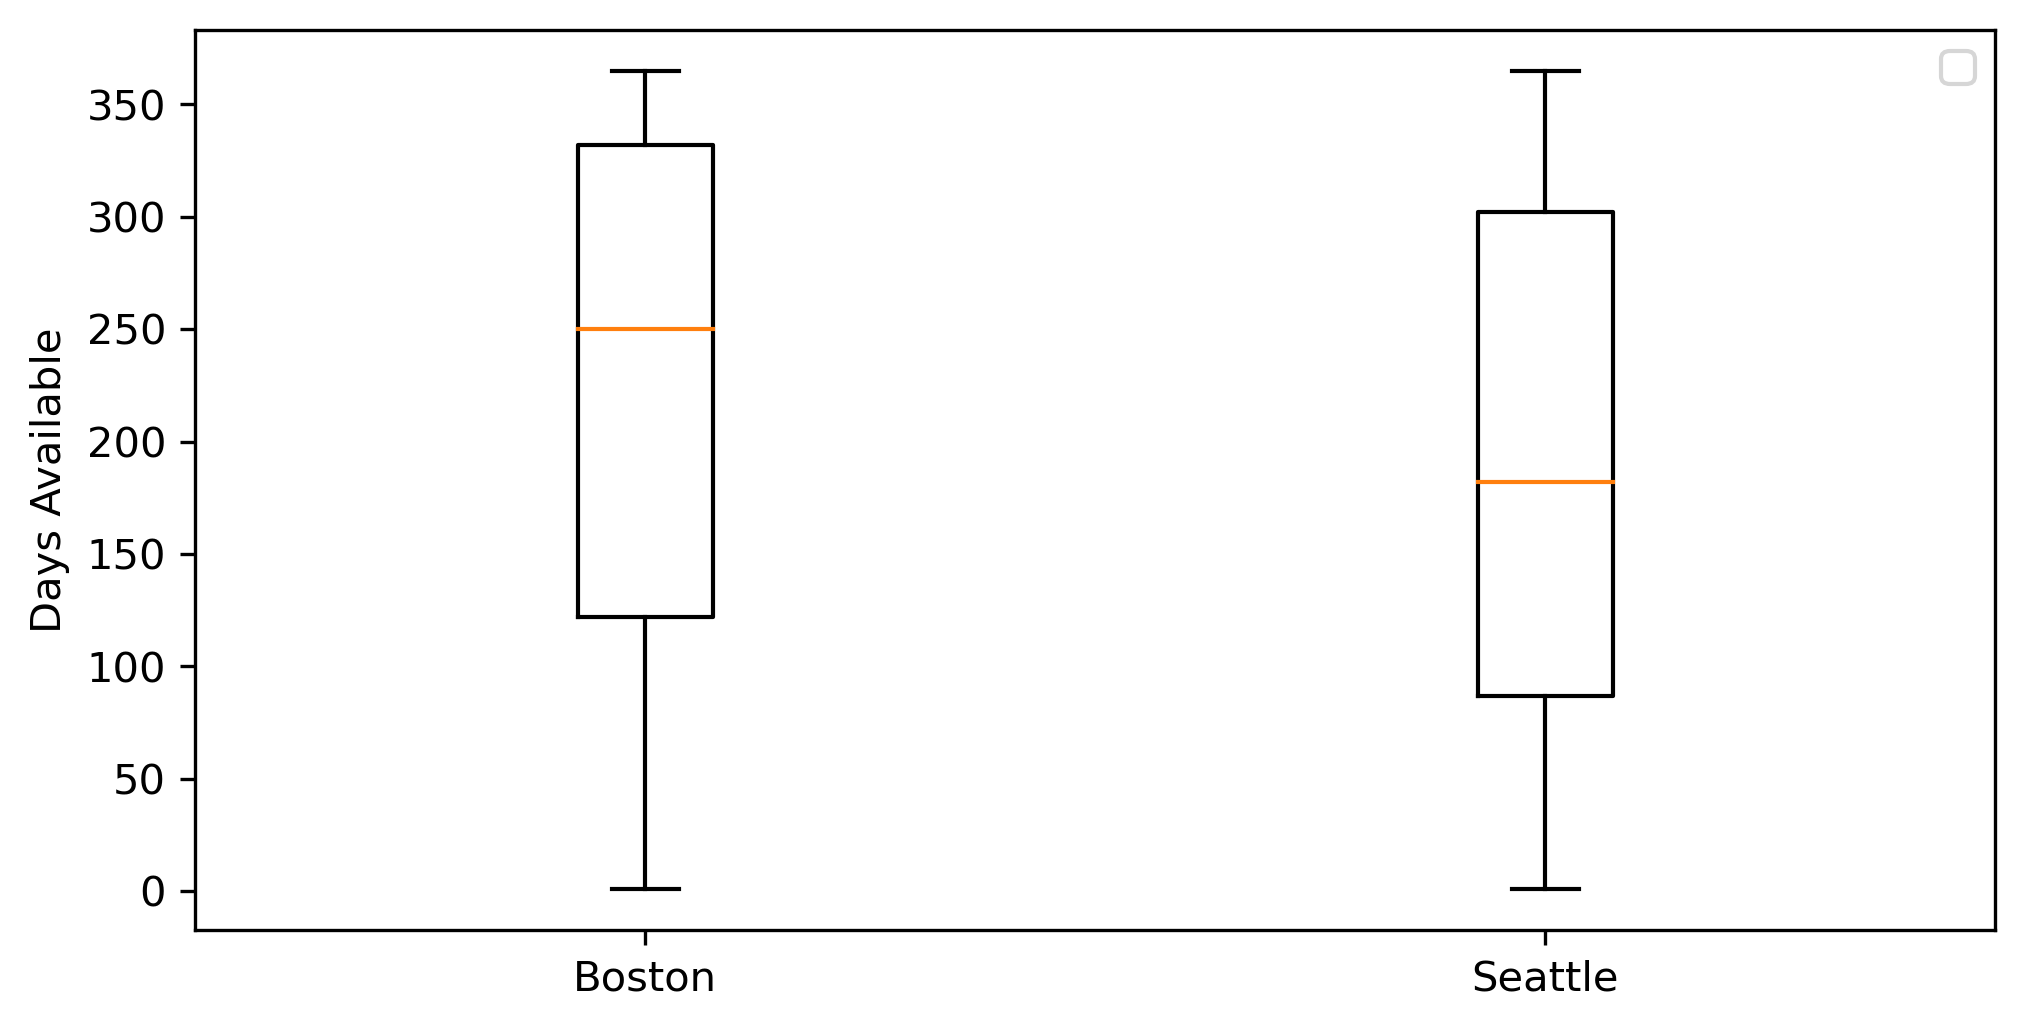

In [64]:
#create a box plot
fig = plt.figure(figsize=(6,3),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.boxplot([boston_available.available.tolist(), seattle_available.available.tolist(),])
ax.set_xticklabels(['Boston','Seattle'])
ax.legend()
ax.set_ylabel('Days Available');
plt.savefig('plots/Days_Available',bbox_inches='tight')

The average available days for a rental property in Boston during a year is more than in Seattle, showing more booking businesses in Boston.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


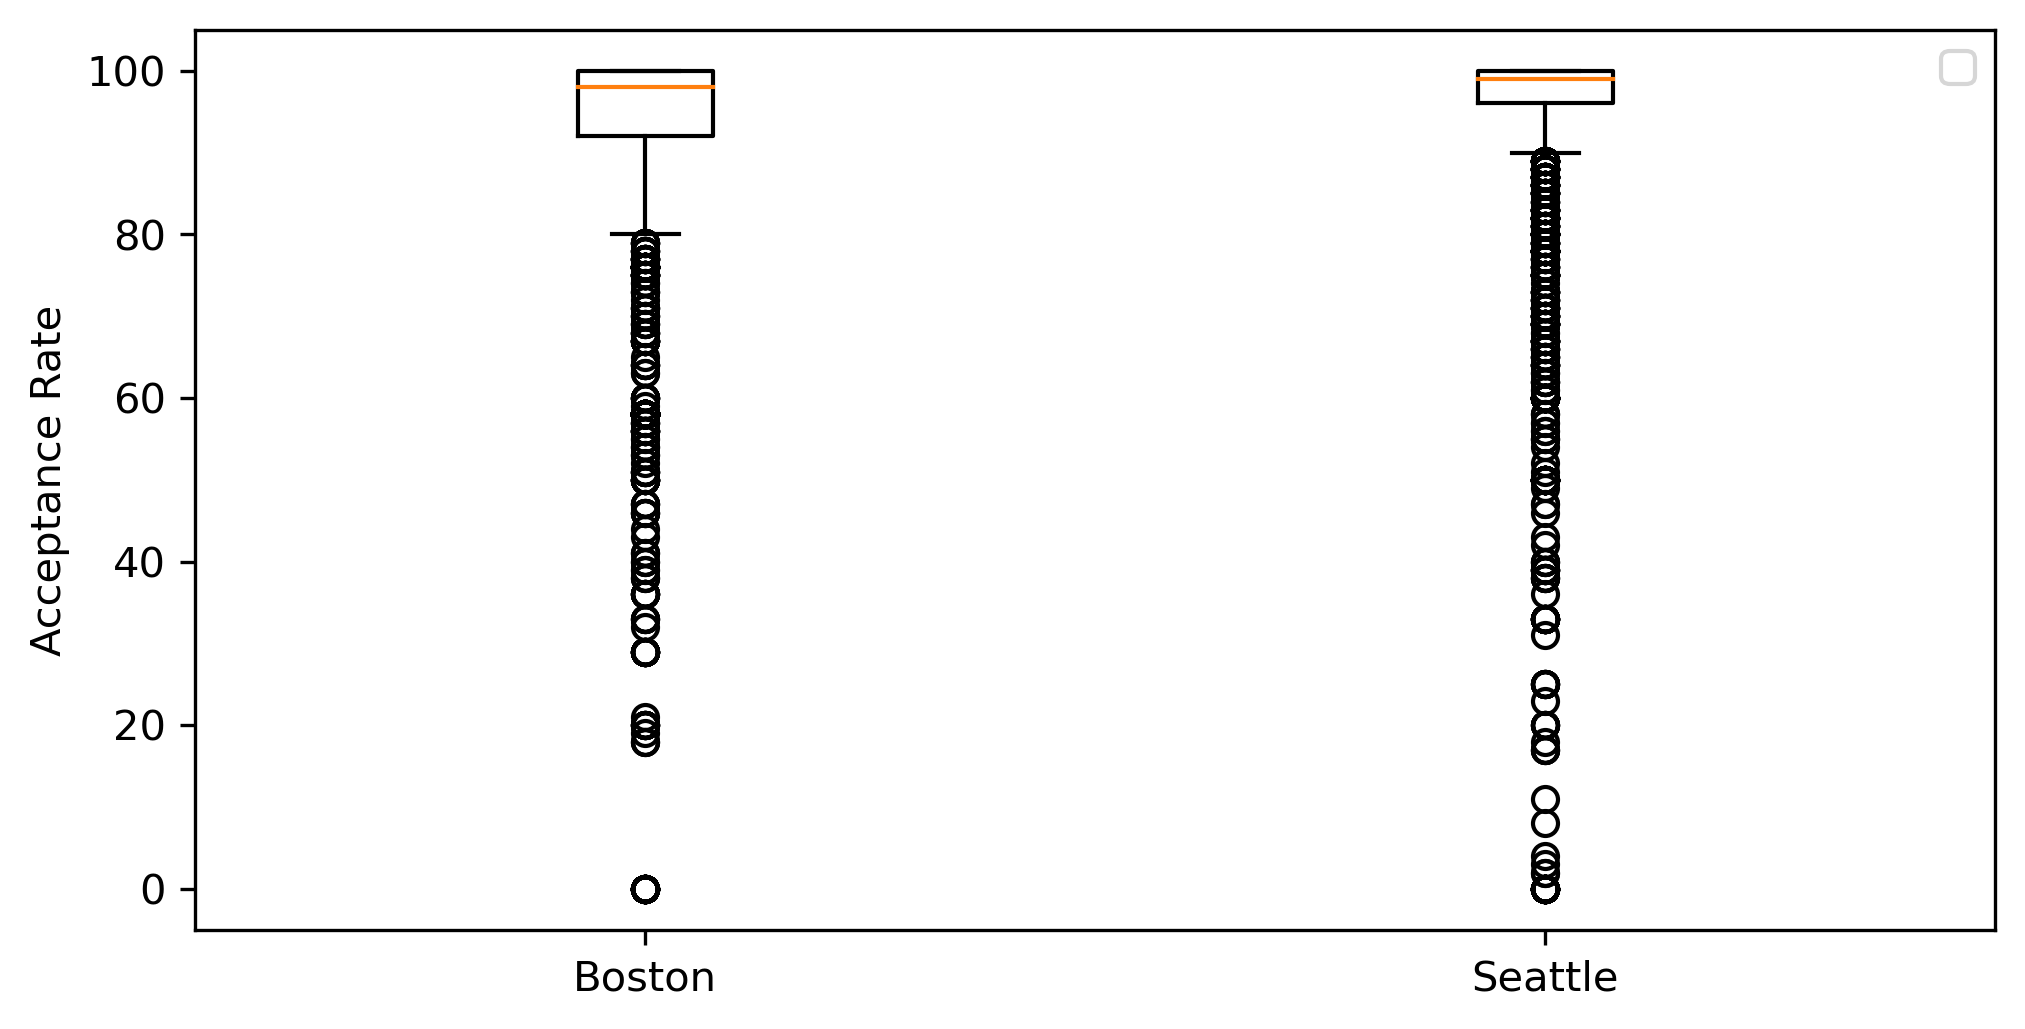

In [65]:
#look at the acceptance rate to find any trends

seattle_listings['acceptance'] = seattle_listings.host_acceptance_rate.str.replace('%','').astype('float')
boston_listings['acceptance'] = boston_listings.host_acceptance_rate.str.replace('%','').astype('float')
#create a box plot
fig = plt.figure(figsize=(6,3),dpi=300)
ax = fig.add_axes([0,0,1,1])
ax.boxplot([boston_listings.acceptance.dropna().tolist(), seattle_listings.acceptance.dropna().tolist()])
ax.set_xticklabels(['Boston', 'Seattle'])
ax.legend()
ax.set_ylabel('Acceptance Rate');

-----------------------------

<a id='q4'></a>
## Question 4

In [66]:
#pick up the top 10 property_type by average price


# Boston
df_boston_ptype = df_boston2[['property_type','price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False)[0:10]
df_boston_ptype = df_boston_ptype .rename(columns = {'index':'property_type'})
df_boston_ptype.reset_index(inplace=True)
df_boston_ptype

,property_type,price
0,Room in hotel,1031.079528
1,Room in boutique hotel,774.168244
2,Entire place,612.277260
3,Entire serviced apartment,513.082757
4,Entire townhouse,495.922329
5,Entire vacation home,435.717808
6,Entire home,429.430288
7,Houseboat,411.942466
8,Boat,356.240183
9,Entire condo,292.763297


In [67]:
# Seattle
df_seattle_ptype = df_seattle2[['property_type','price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False)[0:10]
df_seattle_ptype = df_seattle_ptype.rename(columns = {'index':'property_type'})
df_seattle_ptype.reset_index(inplace=True)
df_seattle_ptype

,property_type,price
0,Entire villa,480.208767
1,Entire vacation home,335.857382
2,Entire home,315.263746
3,Private room in resort,313.383562
4,Entire townhouse,295.329868
5,Private room in loft,245.243836
6,Entire bungalow,241.875012
7,Entire serviced apartment,235.029660
8,Entire condo,229.654639
9,Private room in boat,217.500000


In [188]:
# #plot the average price by property type for Boston

# fig, ax = plt.subplots(figsize = [12, 10])
# property_type = df_boston_ptype.property_type.to_list()
# price = df_boston_ptype.price.to_list()
# bar_colors = [ 'tab:silver']
# ax.bar(property_type, price,   color='blue', alpha=0.8)
# ax.set_ylabel('Price')
# ax.set_title('Average price by property type')
# #ax.legend(title='Property Type')
# plt.xticks(rotation=60)
# plt.savefig('plots/Average_price_by_property_type_Boston',bbox_inches='tight')
# plt.show()




In [189]:
# #plot the average price by property type for Seattle

# fig, ax = plt.subplots(figsize = [12, 10])
# property_type = df_seattle_ptype.property_type.to_list()
# price = df_seattle_ptype.price.to_list()
# bar_colors = [ 'tab:silver']
# ax.bar(property_type, price,   color='blue', alpha=0.8)
# ax.set_ylabel('Price')
# ax.set_title('Average price by property type')
# #ax.legend(title='Property Type')
# plt.xticks(rotation=60)
# plt.savefig('plots/Average_price_by_property_type_Seattle.png',bbox_inches='tight')
# plt.show()


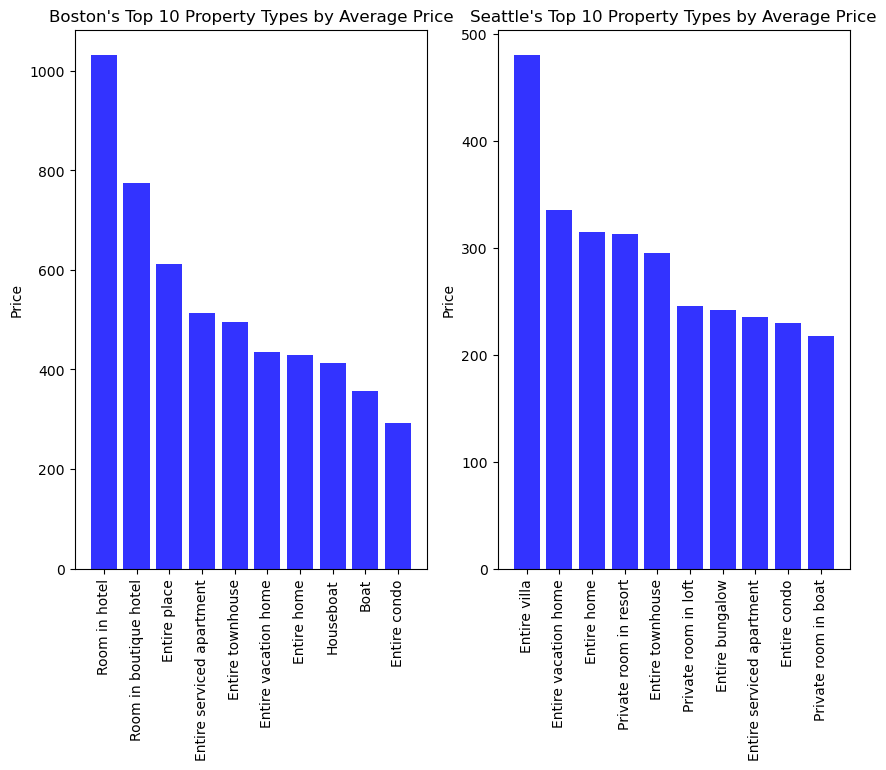

In [226]:
#plot the average price by property type for Boston

fig, ax = plt.subplots(1,2, figsize=(10,7))

#Boston
property_type_boston = df_boston_ptype.property_type.to_list()
price_boston = df_boston_ptype.price.to_list()
bar_colors = [ 'tab:silver']
ax[0].bar(property_type_boston, price_boston,   color='blue', alpha=0.8)
ax[0].set_ylabel('Price')
ax[0].set_title('Boston\'s Top 10 Property Types by Average Price')
ax[0].tick_params(axis='x', rotation=90)

#Seattle
property_type_seattle = df_seattle_ptype.property_type.to_list()
price_seattle = df_seattle_ptype.price.to_list()
bar_colors = [ 'tab:silver']
ax[1].bar(property_type_seattle, price_seattle,   color='blue', alpha=0.8)
ax[1].set_ylabel('Price')
ax[1].set_title('Seattle\'s Top 10 Property Types by Average Price')
ax[1].tick_params(axis='x', rotation=90)

ax[0].tick_params(axis='x', rotation=90)
plt.savefig('plots/Average_price_by_property_type_Boston_Seattle',bbox_inches='tight')
plt.show()

The figure shows the top 10 property types by average price. Boston's top 2 property types are 'room in a hotel' and room in a boutique. Whereas in Seattle, the top 2 are entire villas and entire vacation homes. 

In [69]:
#pick up the top 10 property_type by availabity. We want to see which the top types are Rchosen.
df_boston_booked = df_boston2[df_boston2['available']=="f"].copy()
df_seattle_booked = df_seattle2[df_seattle2['available']=="f"].copy()


In [71]:
df_boston_pt_top_10 = df_boston_booked['property_type'].value_counts().rename_axis('property_type').reset_index(name='booked')
df_boston_pt_top_10[0:10]

,property_type,booked
0,Entire rental unit,286928
1,Private room in rental unit,110221
2,Private room in home,74774
3,Entire condo,71316
4,Entire home,36991
5,Private room in condo,17215
6,Entire guest suite,13529
7,Entire serviced apartment,13360
8,Private room in townhouse,9910
9,Entire townhouse,8451


In [72]:
#Add a percentage column and a new row representing the left property type.

df_temp = df_boston_pt_top_10[0:10]
df_temp['booked_perce']=df_temp['booked']/df_boston_booked.shape[0]

#add new row
new_row = {df_temp.columns.values[0]:'others',
           df_temp.columns.values[1]: df_boston_booked.shape[0]-df_temp['booked'].sum(),
           df_temp.columns.values[2]: 1- df_temp['booked_perce'].sum()}
df_boston_pt_top_10 = df_temp.append(new_row, ignore_index = True)
df_boston_pt_top_10

,property_type,booked,booked_perce
0,Entire rental unit,286928,0.422342
1,Private room in rental unit,110221,0.162239
2,Private room in home,74774,0.110063
3,Entire condo,71316,0.104973
4,Entire home,36991,0.054449
5,Private room in condo,17215,0.025340
6,Entire guest suite,13529,0.019914
7,Entire serviced apartment,13360,0.019665
8,Private room in townhouse,9910,0.014587
9,Entire townhouse,8451,0.012439


In [403]:
#!pip install -U kaleido

In [207]:
#pie plot


labels = df_boston_pt_top_10['property_type'].to_numpy()
values =  df_boston_pt_top_10['booked'].to_numpy()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update(layout_title_text='Boston\'s Top 10 Property Types',
           layout_showlegend=False)
fig.show()


In [195]:
# import os
# my_path = os.getcwd()
# my_file = 'plots\property_type.png'
# print(os.path.join(my_path, my_file))


In [74]:
df_seattle_pt_top_10 = df_seattle_booked['property_type'].value_counts().rename_axis('property_type').reset_index(name='booked')
df_seattle_pt_top_10[0:10]

,property_type,booked
0,Entire home,317650
1,Entire rental unit,275509
2,Entire guest suite,146632
3,Private room in home,120796
4,Entire condo,110914
5,Entire townhouse,102737
6,Entire guesthouse,53659
7,Private room in townhouse,27938
8,Entire serviced apartment,16736
9,Private room in rental unit,11111


In [75]:
#Add a percentage column and a new row representing the left property type.

df_temp = df_seattle_pt_top_10[0:10]
df_temp['booked_perce']=df_temp['booked']/df_seattle_booked.shape[0]

#add new row
new_row = {df_temp.columns.values[0]:'others',
           df_temp.columns.values[1]: df_seattle_booked.shape[0]-df_temp['booked'].sum(),
           df_temp.columns.values[2]: 1- df_temp['booked_perce'].sum()}
df_seattle_pt_top_10 = df_temp.append(new_row, ignore_index = True)
df_seattle_pt_top_10

,property_type,booked,booked_perce
0,Entire home,317650,0.252494
1,Entire rental unit,275509,0.218997
2,Entire guest suite,146632,0.116555
3,Private room in home,120796,0.096018
4,Entire condo,110914,0.088163
5,Entire townhouse,102737,0.081664
6,Entire guesthouse,53659,0.042652
7,Private room in townhouse,27938,0.022207
8,Entire serviced apartment,16736,0.013303
9,Private room in rental unit,11111,0.008832


In [ ]:
# create a function to disply side by side
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, city,titles=cycle([''])):
    html_str='<th style="text-align:center"><td style="vertical-align:top">'
    html_str+=f'<h1>{city}</h1><br>'
    #html_str+='</th>'
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h3 style="text-align: center;">{title}</h3><br>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [ ]:
df_boston_pt_top_10

In [210]:
# print the two table side by side instead of each individually
display_side_by_side(df_boston_pt_top_10,df_seattle_pt_top_10, city="", titles=['Boston\'s Top 10','Seattle\'s Top 10']) 

,property_type,booked,booked_perce
0,Entire rental unit,286928,0.422342
1,Private room in rental unit,110221,0.162239
2,Private room in home,74774,0.110063
3,Entire condo,71316,0.104973
4,Entire home,36991,0.054449
5,Private room in condo,17215,0.025340
6,Entire guest suite,13529,0.019914
7,Entire serviced apartment,13360,0.019665
8,Private room in townhouse,9910,0.014587
9,Entire townhouse,8451,0.012439


In [206]:
#pie plot

labels = df_seattle_pt_top_10['property_type'].to_numpy()
values =  df_seattle_pt_top_10['booked'].to_numpy()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update(layout_title_text='Seattle\'s Top 10 Property Types',
           layout_showlegend=False)
fig.show()

In [77]:
#back to the previous plot, the seasonality is on July. Lets see the top three property type.

#Boston
df_boston_pt_top_3_july = df_boston_booked[df_boston_booked['month']==7]
df_boston_pt_top_3_july = df_boston_pt_top_3_july['property_type'].value_counts().rename_axis('Property_type').reset_index(name='Booked')
df_boston_pt_top_3_july[0:3]

,Property_type,Booked
0,Entire rental unit,35573
1,Private room in rental unit,11697
2,Entire condo,7916


In [78]:
#Seattle
df_seattle_pt_top_3_july = df_seattle_booked[df_seattle_booked['month']==7]
df_seattle_pt_top_3_july = df_seattle_pt_top_3_july['property_type'].value_counts().rename_axis('Property_type').reset_index(name='Booked')
df_seattle_pt_top_3_july[0:3]

,Property_type,Booked
0,Entire rental unit,41447
1,Entire home,37317
2,Entire guest suite,15270


In [81]:
display_side_by_side(df_boston_pt_top_3_july[0:3],df_boston_pt_top_10[0:3], city="Boston", titles=['Top 3 on July','Top in general','Boston']) 

Boston Top 3 on July 
 
 
 
 Property_type 
 Booked 
 
 
 
 
 0 
 Entire rental unit 
 35573 
 
 
 1 
 Private room in rental unit 
 11697 
 
 
 2 
 Entire condo 
 7916 
 
 
 Top in general 
 
 
 
 property_type 
 booked 
 booked_perce 
 
 
 
 
 0 
 Entire rental unit 
 286928 
 0.422342 
 
 
 1 
 Private room in rental unit 
 110221 
 0.162239 
 
 
 2 
 Private room in home 
 74774 
 0.110063

In [83]:
display_side_by_side(df_seattle_pt_top_3_july[0:3],df_seattle_pt_top_10[0:3], city="Seattle", titles=['Top 3 on July','Top in general','Boston']) 

Seattle Top 3 on July 
 
 
 
 Property_type 
 Booked 
 
 
 
 
 0 
 Entire rental unit 
 41447 
 
 
 1 
 Entire home 
 37317 
 
 
 2 
 Entire guest suite 
 15270 
 
 
 Top in general 
 
 
 
 property_type 
 booked 
 booked_perce 
 
 
 
 
 0 
 Entire home 
 317650 
 0.252494 
 
 
 1 
 Entire rental unit 
 275509 
 0.218997 
 
 
 2 
 Entire guest suite 
 146632 
 0.116555

------------------------------------------------------------------------------

<a id='q4'></a>
## Question 4

In [85]:
#show all datasets columns

#Boston
df_boston2.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights_x', 'maximum_nights_x',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_

In [86]:
df_boston2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449780 entries, 896805 to 811759
Data columns (total 83 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   id                                            1449780 non-null  int64         
 1   listing_url                                   1449780 non-null  object        
 2   scrape_id                                     1449780 non-null  int64         
 3   last_scraped                                  1449780 non-null  object        
 4   source                                        1449780 non-null  object        
 5   name                                          1449780 non-null  object        
 6   description                                   1449780 non-null  object        
 7   neighborhood_overview                         1449780 non-null  object        
 8   picture_url                           

In [87]:
#remove irrlevant columns that we think for predicting price

columns_to_drop = ['listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'amenities',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'license',
 'instant_bookable',
 'reviews_per_month','description','host_since']

In [88]:
#drop irrelevant columns

df_boston_dropped = df_boston2.drop(columns = columns_to_drop)
df_seattle_dropped = df_seattle2.drop(columns = columns_to_drop)

In [89]:
#check what left
df_boston_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449780 entries, 896805 to 811759
Data columns (total 45 columns):
 #   Column                                        Non-Null Count    Dtype         
---  ------                                        --------------    -----         
 0   id                                            1449780 non-null  int64         
 1   source                                        1449780 non-null  object        
 2   host_response_time                            1449780 non-null  object        
 3   host_response_rate                            1449780 non-null  object        
 4   host_listings_count                           1449780 non-null  int64         
 5   property_type                                 1449780 non-null  object        
 6   room_type                                     1449780 non-null  object        
 7   accommodates                                  1449780 non-null  int64         
 8   bathrooms_text                        

In [90]:
#select all object columns
object_columns_boston = df_boston_dropped.select_dtypes(include=['object']).columns.tolist()
object_columns_boston

object_columns_seattle = df_seattle_dropped.select_dtypes(include=['object']).columns.tolist()
object_columns_seattle

['source',
 'host_response_time',
 'host_response_rate',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text',
 'available']

In [91]:
#Convert categorical variable into dummy                    
df_dum_boston = pd.get_dummies(df_boston_dropped, columns=object_columns_boston, prefix='dum')
df_dum_seattle = pd.get_dummies(df_seattle_dropped, columns=object_columns_seattle, prefix='dum')

In [92]:
(df_dum_boston.shape, df_boston_dropped.shape), (df_dum_seattle.shape,df_seattle_dropped.shape)

(((1449780, 149), (1449780, 45)), ((2421778, 180), (2421778, 46)))

In [93]:
df_dum_boston.head(3)

,id,host_listings_count,accommodates,bedrooms,beds,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,dum_3.5 shared baths,dum_4 baths,dum_4 shared baths,dum_4.5 baths,dum_5 baths,dum_6 baths,dum_Half-bath,dum_Private half-bath,dum_f,dum_t
896805,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0
896806,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0
896807,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0


In [96]:
#Boston

#df_boston = df_dum_boston.drop(columns=['index'])
# df_boston.reset_index(inplace=True)
# df_boston = df_boston.drop(columns=['index'])
df_boston =df_dum_boston
df_boston.head(3)

,id,host_listings_count,accommodates,bedrooms,beds,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,dum_3.5 shared baths,dum_4 baths,dum_4 shared baths,dum_4.5 baths,dum_5 baths,dum_6 baths,dum_Half-bath,dum_Private half-bath,dum_f,dum_t
896805,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0
896806,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0
896807,3781,4,2,1.0,1.0,32,1125,32,32,1125,...,0,0,0,0,0,0,0,0,1,0


In [97]:
#Seattle

#df_seattle = df_dum_seattle.drop(columns=['index'])
# df_seattle.reset_index(inplace=True)
# df_seattle = df_seattle.drop(columns=['index'])
df_seattle =df_dum_seattle
df_seattle.head(3)

,id,host_listings_count,accommodates,bedrooms,beds,minimum_nights_x,maximum_nights_x,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,dum_5 baths,dum_5.5 baths,dum_6 baths,dum_6.5 baths,dum_7 baths,dum_Half-bath,dum_Private half-bath,dum_Shared half-bath,dum_f,dum_t
1072371,6606,5,1,1.0,1.0,30,1125,30.0,30.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
1072372,6606,5,1,1.0,1.0,30,1125,30.0,30.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
1072373,6606,5,1,1.0,1.0,30,1125,30.0,30.0,1125.0,...,0,0,0,0,0,0,0,0,1,0


In [98]:
#drop date variable as we did split it into a set of variables
df_boston.drop(columns=['date'], inplace=True)
df_seattle.drop(columns=['date'], inplace=True)

In [99]:
#check if there is another variable with datetime type
df_boston.select_dtypes(include=['datetime64']).columns.tolist()

[]

In [100]:
#check if there is still non in datasets
df_boston[df_boston.isnull().any(axis=1)].columns

Index(['id', 'host_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights_x', 'maximum_nights_x', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       ...
       'dum_3.5 shared baths', 'dum_4 baths', 'dum_4 shared baths',
       'dum_4.5 baths', 'dum_5 baths', 'dum_6 baths', 'dum_Half-bath',
       'dum_Private half-bath', 'dum_f', 'dum_t'],
      dtype='object', length=148)

In [101]:
#check if there is still non in datasets
df_seattle[df_seattle.isnull().any(axis=1)].columns

Index(['id', 'host_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights_x', 'maximum_nights_x', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       ...
       'dum_5 baths', 'dum_5.5 baths', 'dum_6 baths', 'dum_6.5 baths',
       'dum_7 baths', 'dum_Half-bath', 'dum_Private half-bath',
       'dum_Shared half-bath', 'dum_f', 'dum_t'],
      dtype='object', length=179)

In [102]:
#drop null
df_boston = df_boston.dropna()
df_seattle = df_seattle.dropna()

In [103]:
#check if there is null again
(df_boston.isnull().sum()).sum()==0, (df_seattle.isnull().sum()).sum()==0

(True, True)

In [105]:
df_boston.shape, df_seattle.shape

((1449761, 148), (2421777, 179))

### Create 3 Functions

#### Splitting function

In [106]:
def splitData(X,y, test_size, rand_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    return X_train, X_test, y_train, y_test

#### Feature selection function

In [108]:
# feature selection function
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def select_features(X_train, y_train, X_test, k='all'):
    # configure to select a subset of features
    fs = SelectKBest(score_func=f_regression, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

#### Listing features Scores function

In [109]:
# what are scores for the features

def listingfeaturesScores(columns, fs):
#columns = X_train.columns.to_list()
    df_temp=pd.DataFrame()

    for i in range(len(fs.scores_)):
        #print('Feature %d: %s ----> %f' % (i, columns[i], fs.scores_[i]))
        df_loop = {'feature':columns[i], 'score':fs.scores_[i]}
       # print(df_loop)
        df_temp = df_temp.append(df_loop, ignore_index=True)

    df_temp = df_temp.sort_values(by='score', ascending=False,ignore_index=True)
    return df_temp

#### Scaling function

In [110]:
from sklearn.preprocessing import StandardScaler

def scaleData(X_train, X_test): 
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

#### Train Model Function

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def trainModel(X_train, y_train, X_test, y_test):
    #train model
    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return test_score, train_score

### Boston

In [213]:
X = df_boston.drop(columns=['id','price'])
y = df_boston['price']

#call splitting function
X_train, X_test, y_train, y_test = splitData(X,y, 0.2, 545)

#call features selection function
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

#call listing features function
df_features = listingfeaturesScores(X_train.columns.to_list(), fs)

df_features

,feature,score
0,accommodates,140015.315461
1,bedrooms,122088.306571
2,beds,120958.656300
3,dum_Private room,75118.348488
4,dum_2 baths,55005.429620
...,...,...
141,dum_67%,0.479611
142,dayofyear,0.140661
143,dum_Room in aparthotel,0.035905
144,month,0.008337


In [214]:
#set position values for features
y_pos = np.arange(len(df_features['feature'][0:20]))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

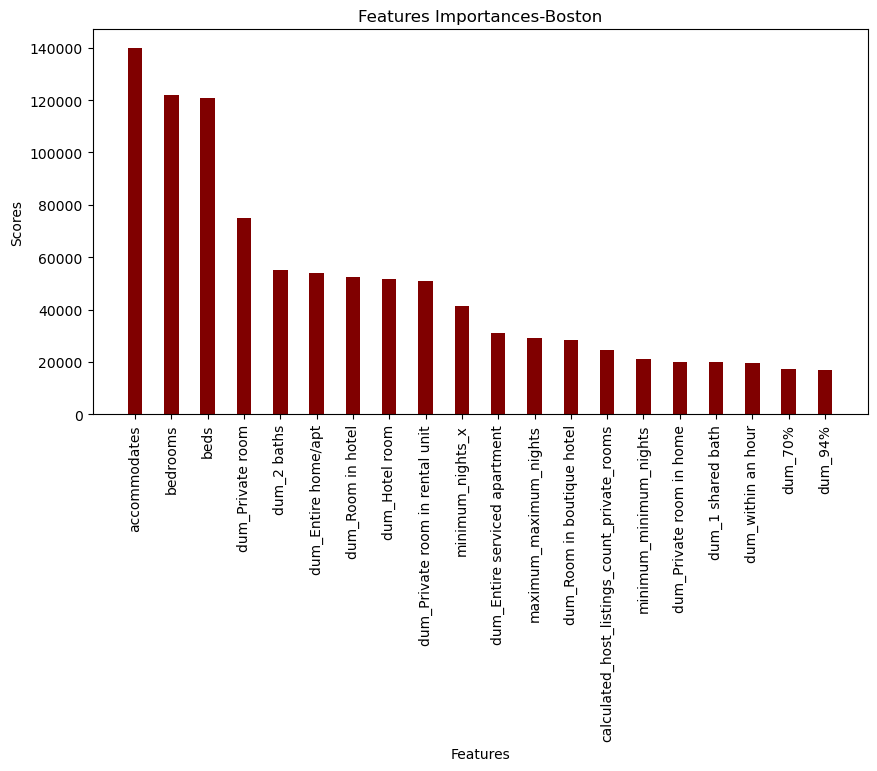

In [215]:
#plot the top 20 features
features = df_features['feature'][0:20].to_list()
scores = df_features['score'][0:20].to_list()
y_pos = np.arange(len(df_features['feature'][0:20]))
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(features, scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Scores")
plt.xticks(y_pos, features, rotation='vertical')
plt.title("Features Importances-Boston")
plt.savefig('plots/featuresSelectionBoston',bbox_inches='tight')
plt.show()

In [217]:
#pickup only the top 30
top_30_features_list = df_features[0:29]['feature'].to_list()
X_train = X_train[top_30_features_list]
X_test = X_test[top_30_features_list]

In [218]:
#scall
X_train, X_test = scaleData(X_train, X_test)

#print the shape of splitted data 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1159808, 30), (1159808,)), ((289953, 30), (289953,)))

In [219]:
#call train model function
test_score, train_score = trainModel(X_train, y_train, X_test, y_test)
print(test_score, train_score)

0.290739680826123 0.28685915293633757


### Seattle

In [220]:
X = df_seattle.drop(columns=['id','price'])
y = df_seattle['price']

#call splitting function
X_train, X_test, y_train, y_test = splitData(X,y, 0.2, 546)

#call features selection function
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

#call listing features function
df_features = listingfeaturesScores(X_train.columns.to_list(), fs)

df_features

,feature,score
0,accommodates,365836.140382
1,bedrooms,357200.677311
2,beds,304875.059142
3,dum_Entire home,108989.826923
4,dum_1 bath,76838.506347
...,...,...
172,dum_Private half-bath,2.543567
173,dum_Private room in boat,0.446558
174,dum_Capitol Hill,0.250805
175,dum_82%,0.101069


In [221]:
#set position values for features
y_pos = np.arange(len(df_features['feature'][0:20]))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

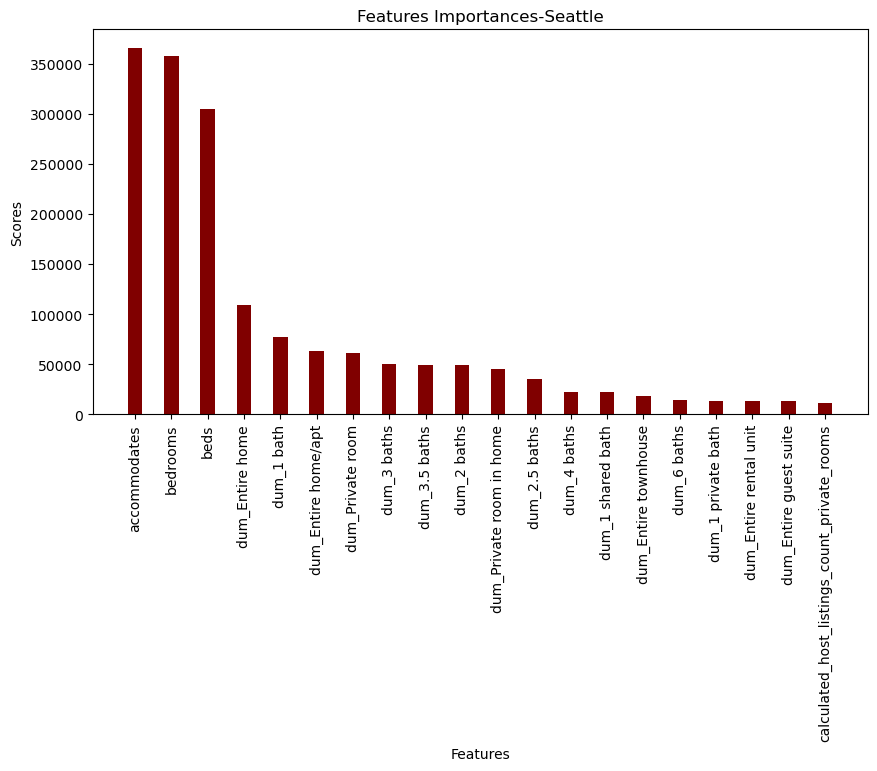

In [222]:
#plot the top 20 features
features = df_features['feature'][0:20].to_list()
scores = df_features['score'][0:20].to_list()
y_pos = np.arange(len(df_features['feature'][0:20]))
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(features, scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Scores")
plt.xticks(y_pos, features, rotation='vertical')
plt.title("Features Importances-Seattle")
plt.savefig('plots/featuresSelectionSeattle',bbox_inches='tight')
plt.show()

In [223]:
#pickup only the top 29
top_30_features_list = df_features[0:29]['feature'].to_list()
X_train = X_train[top_30_features_list]
X_test = X_test[top_30_features_list]

In [224]:
#scall
X_train, X_test = scaleData(X_train, X_test)

#print the shape of splitted data 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1937421, 30), (1937421,)), ((484356, 30), (484356,)))

In [225]:
#call train model function
test_score, train_score = trainModel(X_train, y_train, X_test, y_test)
print(test_score, train_score)

0.21572673024503564 0.1966371681225857


The R2 scores for the two models are not encouraging, but I am sure I will be able to improve the ML model at the end of this course.

----------------------

<a id='q6'></a>
## Question 6

I will use a sentiment analysis tool, Vader, to classify comments for customers' reviews. 

In [231]:
#install vaderSentimentlibrary
!pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

     ------------------------------------ 126.0/126.0 kB 567.2 kB/s eta 0:00:00


Let's try it

In [241]:
sentiment_vader(" It was amazing. Everything fitted well")

(0.0, 0.404, 0.596, 0.7096, 'Positive')

In [242]:
sentiment_vader("I don't know how to say it but I expected more")

(0.0, 1.0, 0.0, 0.0, 'Neutral')

let's challenge it

In [243]:
sentiment_vader("The experience was what I expected, and it is hard not to give them a thumb up")

(0.08, 0.92, 0.0, -0.1027, 'Negative')

Well, I don't expect it to have 100% accuracy, but I think it will do a good job.

In [244]:
#check boston reviews
boston_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,3781,37776825,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,41842494,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,45282151,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,49022647,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,52503327,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...,...
174507,893975999133947853,898547534751030603,2023-05-24,516208792,Katherine,"Very spacious, clean and comfortable. Highly r..."
174508,893975999133947853,908681741437409696,2023-06-07,169155474,Kari,thanks for all the helpful information about g...
174509,896170185862100440,918129405470822974,2023-06-20,14805192,Lorena,Eddie is a wonderful host—he was super respons...
174510,896426215566639130,914465954641543171,2023-06-15,23667572,Nurlan,Cozy place!


In [425]:
#shuffle the dataf

from sklearn.utils import shuffle
df_boston_review_shuffle = shuffle(boston_reviews)
df_seattle_review_shuffle = shuffle(seattle_reviews)

In [426]:
#check null
df_boston_review_shuffle['comments'].isnull().sum(), df_seattle_review_shuffle['comments'].isnull().sum()

(50, 65)

How does Vadel deal with null?

In [246]:
sentiment_vader(" ")

(0.0, 0.0, 0.0, 0.0, 'Neutral')

As we see, we don't need to remove null comments

In [427]:
#detect sentiments in comments
def review_to_sentiments(reviews):
    sentiment = []
    for review  in reviews:
        sentiment.append(sentiment_vader(review)[4])
    return sentiment

In [428]:
#sentiment = review_to_sentiments(boston_reviews['comments'].to_list())

I used the disabled line above but faced an issue with the text. We need to clean the comments before we pass them to Vader.

In [361]:
# import required library for the following step.

from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mac14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [362]:
# Create a function for perocessing data

ps=PorterStemmer()

def processing(review):
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", str(review))
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review) 
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review) 
    raw_review = re.sub('\d+(\.\d+)?', " ", raw_review)
    words = raw_review.lower().split()                                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   
    # Preprocessing of text involves:
    # Remove email addresses
    # Remove URLs
    # Remove non-letters
    # Remove numbers
    # Convert to lower case, split into individual words
    # Gather the list of stopwords in English Language
    # Remove stop words and stemming the remaining words
    # Join the tokens back into one string separated by space, 
    # and return the result.
    
    return( " ".join( meaningful_words ))

In [364]:
# import string
# def processing1(review):
#     PUNCT_TO_REMOVE = string.punctuation
#     text = review.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
#     return text

In [365]:
def text_preprocess(data):
  corpus=[]
  #data = data.reset_index()
  for i in range(0,len(data)):
    corpus.append(processing(data[i]))
  return corpus

In [430]:
#call text_preproces for cleaning comments

boston_corpus = text_preprocess(df_boston_review_shuffle['comments'][0:2999].to_list())
seattle_corpus = text_preprocess(df_seattle_review_shuffle['comments'][0:2999].to_list())

In [431]:
#utilize Vader tool by calling the function

boston_sentiment = review_to_sentiments(boston_corpus)
seattle_sentiment = review_to_sentiments(seattle_corpus)

On the first try, I used all comments, and the function kept working as it won't stop. I interrupted it, and I tried again with only 3000 comments.

In [432]:
#create DF for merging all the resutls in one dataset.

df_reviews_sentiment= pd.DataFrame()
df_reviews_sentiment['bosotn_comments']= boston_corpus
df_reviews_sentiment['boston_sentiments'] = boston_sentiment
df_reviews_sentiment['seattle_comments']= seattle_corpus
df_reviews_sentiment['seattle_sentiments'] = seattle_sentiment

df_reviews_sentiment

,bosotn_comments,boston_sentiments,seattle_comments,seattle_sentiments
0,alojamiento con encanto un poco alejado de la ...,Negative,enjoy stay seattl citi suit travel toddler pos...,Positive
1,toni place perfectli locat cool apart guest st...,Positive,home comfort clean well locat better weather w...,Positive
2,close everyth great place comfort,Positive,maggi place simpli fantast quick respond messa...,Positive
3,gilda husband great host welcom place clean ni...,Positive,fantast locat host,Neutral
4,stay month internship nice locat cozi place lo...,Positive,comfi,Neutral
...,...,...,...,...
2994,great locat easi walk place excel valu smaller...,Positive,paul place conveni locat west seattl ampl way ...,Positive
2995,,Neutral,great place,Positive
2996,jone nice host hous beauti victorian exquisit ...,Positive,absolut fantast place stay seattl within walk ...,Positive
2997,real clean cozi comfort host super kind walk u...,Positive,excel locat walk pike place market area store ...,Positive


In [454]:
#Boston mean

#get the mean for positive in Boston
boston_postive_mean = df_reviews_sentiment[df_reviews_sentiment['boston_sentiments']=='Positive']['boston_sentiments'].count() / df_reviews_sentiment.shape[0]
#get the mean for negative in Boston
boston_negative_mean = df_reviews_sentiment[df_reviews_sentiment['boston_sentiments']=='Negative']['boston_sentiments'].count() / df_reviews_sentiment.shape[0]
#get the mean for neutral in Boston
boston_neutral_mean = df_reviews_sentiment[df_reviews_sentiment['boston_sentiments']=='Neutral']['boston_sentiments'].count() / df_reviews_sentiment.shape[0]



#Seattle mean

#get the mean for positive in Boston
seattle_postive_mean = df_reviews_sentiment[df_reviews_sentiment['seattle_sentiments']=='Positive']['seattle_sentiments'].count() / df_reviews_sentiment.shape[0]
#get the mean for negative in Boston
seattle_negative_mean = df_reviews_sentiment[df_reviews_sentiment['seattle_sentiments']=='Negative']['seattle_sentiments'].count() / df_reviews_sentiment.shape[0]
#get the mean for neutral in Boston
seattle_neutral_mean = df_reviews_sentiment[df_reviews_sentiment['seattle_sentiments']=='Neutral']['seattle_sentiments'].count() / df_reviews_sentiment.shape[0]




In [451]:
df_reviews_sentiment.shape[0]

2999

In [461]:
#create df for plot

postive = [boston_postive_mean, seattle_postive_mean]
negative = [boston_negative_mean, seattle_negative_mean]
neutral = [boston_neutral_mean , seattle_neutral_mean ]
#index = ['Boston','Seattle']

df_review_plot = pd.DataFrame({'city':['Boston', 'Seattle'],
                               'postive': postive,
                                'negative': negative,
                                 'neutral': neutral})
                        

df_review_plot

,city,postive,negative,neutral
0,Boston,0.922307,0.020674,0.057019
1,Seattle,0.948650,0.010003,0.041347


<AxesSubplot:title={'center':'1000 Reviews Sentiments Picked up'}, ylabel='city'>

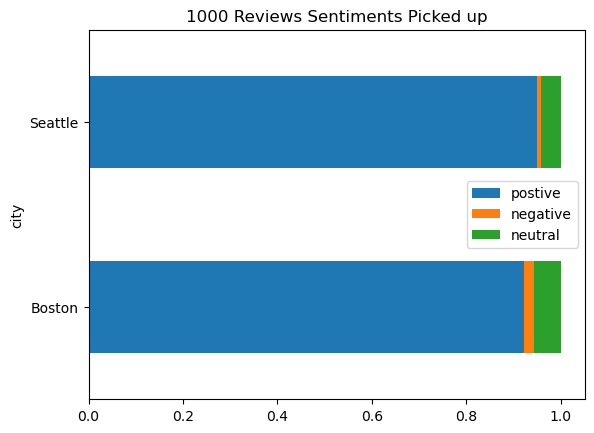

In [466]:
# plot a Stacked Bar Chart using matplotlib
df_review_plot.plot(
    x = 'city',
    kind = 'barh',
    stacked = True,
    title = '1000 Reviews Sentiments Picked up',
    mark_right = True)

Look like most the customers are satisfied with service in both cities.

I can go to the RNN models with unsupervised learning to detect sentiments for all reviews, but it is time-consuming. 3000 for getting an initial big picture is enough.

In [467]:
boston_reviews.shape, seattle_reviews.shape

((174512, 6), (425070, 6))

In [464]:
print('done')

done
